In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [3]:
%matplotlib inline

In [4]:
df_movienet_a0_modified = pd.read_csv("movinet_A0_modified.csv")

In [5]:
df_movienet_a0_extended = pd.read_csv("movinet_A0_extended.csv")

In [6]:
df_movienet_a1_extended = pd.read_csv("movinet_A1_extended.csv")

In [7]:
df_movienet_a1_modified = pd.read_csv("movinet_A1_modified.csv")

In [8]:
df_npef_movienet_a0_modified = pd.read_csv("npef_movinet_A0_modified.csv")
# positive label is the ill condition (not preserved LVEF)
df_npef_movienet_a0_modified.label = 1 - df_npef_movienet_a0_modified.label
df_npef_movienet_a0_modified.pred = 1 - df_npef_movienet_a0_modified.pred
df_npef_movienet_a0_modified.prob = 1 - df_npef_movienet_a0_modified.prob

In [9]:
df_npef_movienet_a0_extended = pd.read_csv("npef_movinet_A0_extended.csv")
# positive label is the ill condition (not preserved LVEF)
df_npef_movienet_a0_extended.label = 1 - df_npef_movienet_a0_extended.label
df_npef_movienet_a0_extended.pred = 1 - df_npef_movienet_a0_extended.pred
df_npef_movienet_a0_extended.prob = 1 - df_npef_movienet_a0_extended.prob

In [10]:
df_npef_movienet_a0_extended

,path,true_class,pred_class,label,pred,prob
0,npef_movienet_50f/test/preserved\0X2C41E0CF273...,preserved,preserved,0,0,0.381632
1,npef_movienet_50f/test/not_preserved\0X475268C...,not_preserved,preserved,1,0,0.374928
2,npef_movienet_50f/test/not_preserved\0X44F9A80...,not_preserved,not_preserved,1,1,0.682925
3,npef_movienet_50f/test/preserved\0X158B03C45BB...,preserved,not_preserved,0,1,0.677871
4,npef_movienet_50f/test/preserved\0X5FBE580FA44...,preserved,preserved,0,0,0.378118
...,...,...,...,...,...,...
363,npef_movienet_50f/test/preserved\0X36DFB3273B2...,preserved,preserved,0,0,0.442941
364,npef_movienet_50f/test/not_preserved\0X662EF84...,not_preserved,not_preserved,1,1,0.746025
365,npef_movienet_50f/test/preserved\0X593E7BA6491...,preserved,preserved,0,0,0.339959
366,npef_movienet_50f/test/not_preserved\0X1AB9875...,not_preserved,not_preserved,1,1,0.655038


In [11]:
def plot_multi_ROC_model(name, model_dic, option = "ROC", pos_label = "reduced",
                         drop_intermediate = False, size_legend = 6):
    
    prop={'size': size_legend}
    
    plt.figure(0).clf()
    if option == "ROC": 
        plt.ylabel("True Positive Rate")
        plt.xlabel("False Positive Rate")
    elif option == "PRC":
        plt.ylabel("Precision")
        plt.xlabel("Recall")
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    if option == "ROC":
        plt.plot([0,1], [0,1], 'k--')
    #plt.suptitle(suptitle)
    plt.title(name, fontsize = 10)
    
    for curve_name, df in model_dic.items():
        
        if option == "ROC":   
            abs, ord, _ = roc_curve(df.label, df.prob)
            auc = roc_auc_score(df.label, df.prob)
        elif option == "PRC":
            abs, ord, _ = precision_recall_curve(df.true_class, df.prob, 
                                                 pos_label = pos_label,
                                                 drop_intermediate = drop_intermediate,
                                                )
            auc = average_precision_score(df.label, df.prob) 
        plt.plot(abs,ord,
                 label= curve_name+" - AUC = %0.4f" % auc)
    plt.legend(loc = 0, prop=prop)    
    plt.show()
    return

In [12]:
model_dic_reduced_ef = {
    "MoViNet A0 modified" : df_movienet_a0_modified,
    "MoViNet A0 extended" : df_movienet_a0_extended,
    "MoViNet A1 modified" : df_movienet_a1_modified,
    "MoViNet A1 extended" : df_movienet_a1_extended,
    #"A0 modified, not preserved EF": df_npef_movienet_a0_modified
}
model_dic_not_preserved_ef = {
    "MoViNet A0 modified": df_npef_movienet_a0_modified,
    "MoViNet A0 extended": df_npef_movienet_a0_extended
}

model_dic = {
    "A0 modified rEF" : df_movienet_a0_modified,
    "A0 extended rEF" : df_movienet_a0_extended,
    "A1 modified rEF" : df_movienet_a1_modified,
    "A1 extended rEF" : df_movienet_a1_extended,
    "A0 modified npEF": df_npef_movienet_a0_modified,
    "A0 extended npEF": df_npef_movienet_a0_extended
}

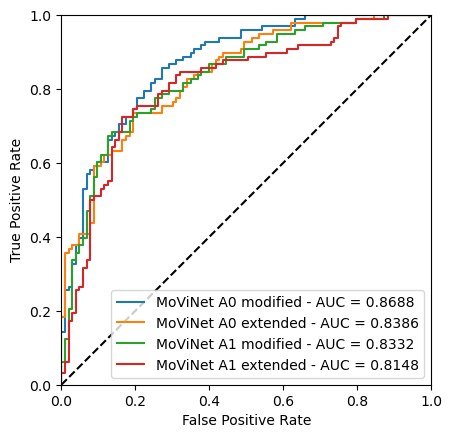

In [13]:
plot_multi_ROC_model(None, model_dic_reduced_ef, size_legend = 10 )

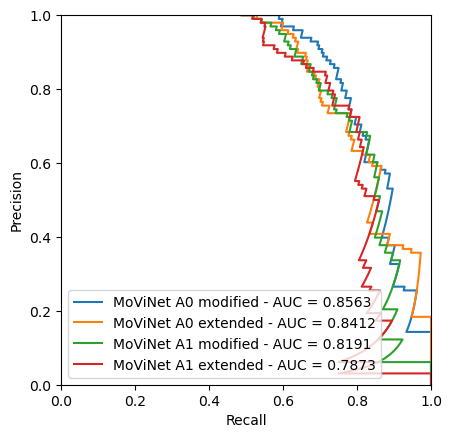

In [14]:
plot_multi_ROC_model(None, model_dic_reduced_ef, size_legend = 10, option = "PRC", pos_label = "reduced" )

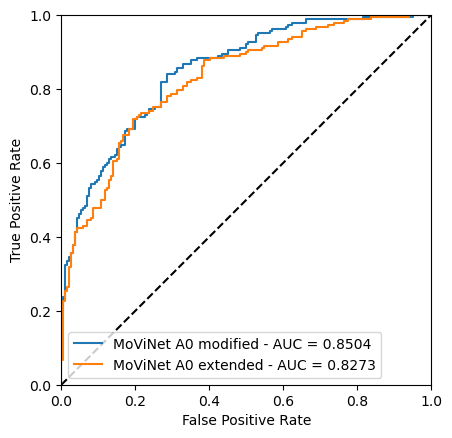

In [15]:
plot_multi_ROC_model(None, model_dic_not_preserved_ef, size_legend = 10 )

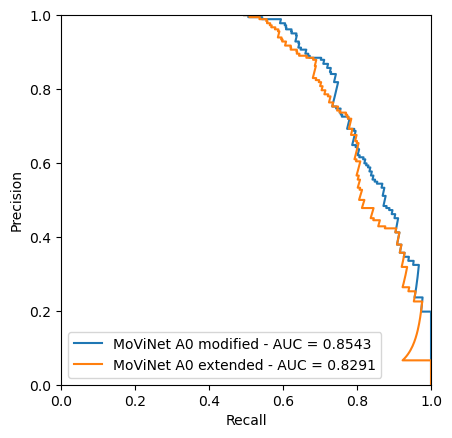

In [16]:
plot_multi_ROC_model(None, model_dic_not_preserved_ef, size_legend = 10, option = "PRC", pos_label = "not_preserved" )

In [17]:
roc_auc_list = []
pr_auc_list = []
acc_list = []
bacc_list = []
p0_list = []
r0_list = []
f0_list = []
p1_list = []
r1_list = []
f1_list = []
index_m =[]
for model, df in model_dic.items():
    roc_auc_m = roc_auc_score(df.label, df.prob)
    acc_m = accuracy_score(df.label, df.pred)
    precision, recall, fscore, _ = precision_recall_fscore_support(df.label, df.pred)
    pr_auc_m = average_precision_score(df.label, df.prob)
   
    roc_auc_list.append(roc_auc_m)
    pr_auc_list.append(pr_auc_m)
    acc_list.append(acc_m)
    bacc_list.append(np.mean(precision))
    p0_list.append(precision[0])
    r0_list.append(recall[0])
    f0_list.append(fscore[0])
    p1_list.append(precision[1])
    r1_list.append(recall[1])
    f1_list.append(fscore[1])
    index_m.append(model)   

In [18]:
df_m = pd.DataFrame(acc_list, index = index_m, columns = ['Accuracy'])
df_m['Balanced accuracy'] = bacc_list
df_m['ROC AUC'] =  roc_auc_list
df_m['PR AUC'] =  pr_auc_list
df_m['Precision 1'] = p1_list
df_m['Recall 1 (sensitivity)'] = r1_list
df_m['F1 score 1'] = f1_list
df_m['Precision 0'] = p0_list
df_m['Recall 0 (specificity)'] = r0_list
df_m['F1 Score 0'] = f0_list

df_m.transpose()

,A0 modified rEF,A0 extended rEF,A1 modified rEF,A1 extended rEF,A0 modified npEF,A0 extended npEF
Accuracy,0.776119,0.756219,0.761194,0.771144,0.750000,0.728261
Balanced accuracy,0.776732,0.756306,0.761438,0.772038,0.750444,0.738452
ROC AUC,0.868833,0.838617,0.833168,0.814840,0.850378,0.827307
PR AUC,0.856282,0.841208,0.819075,0.787260,0.854297,0.829102
Precision 1,0.784946,0.757895,0.745098,0.782609,0.736842,0.686364
Recall 1 (sensitivity),0.744898,0.734694,0.775510,0.734694,0.769231,0.829670
F1 score 1,0.764398,0.746114,0.760000,0.757895,0.752688,0.751244
Precision 0,0.768519,0.754717,0.777778,0.761468,0.764045,0.790541
Recall 0 (specificity),0.805825,0.776699,0.747573,0.805825,0.731183,0.629032
F1 Score 0,0.786730,0.765550,0.762376,0.783019,0.747253,0.700599


In [19]:
def plot_confusion_matrix(model, df, labels, display_labels):
    cm = confusion_matrix(df.true_class, df.pred_class, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=display_labels,                              
                                 )    
    print(model)
    disp.plot()
    plt.show()

MoViNet A0 modified


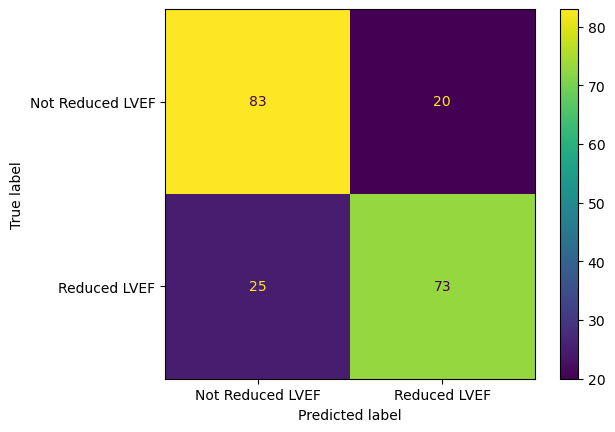

MoViNet A0 extended


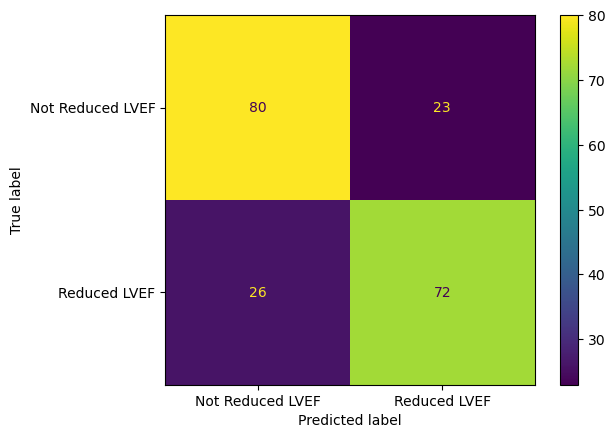

MoViNet A1 modified


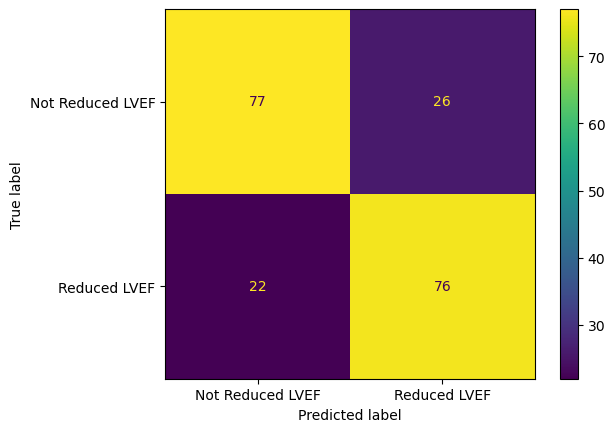

MoViNet A1 extended


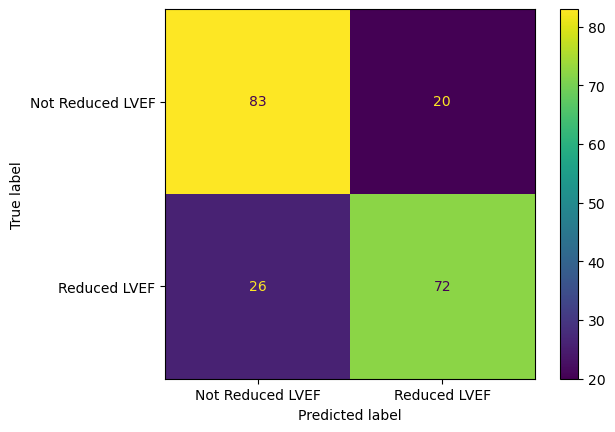

In [20]:
for model, df in model_dic_reduced_ef.items():
     plot_confusion_matrix(model, df, labels=['not_reduced','reduced'],
                          display_labels=['Not Reduced LVEF','Reduced LVEF']
                          )   

MoViNet A0 modified


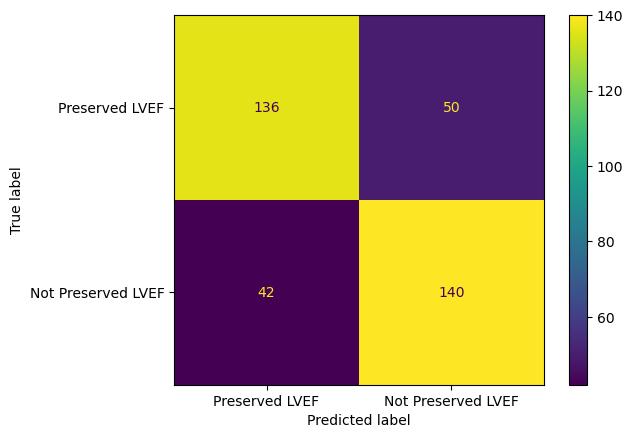

MoViNet A0 extended


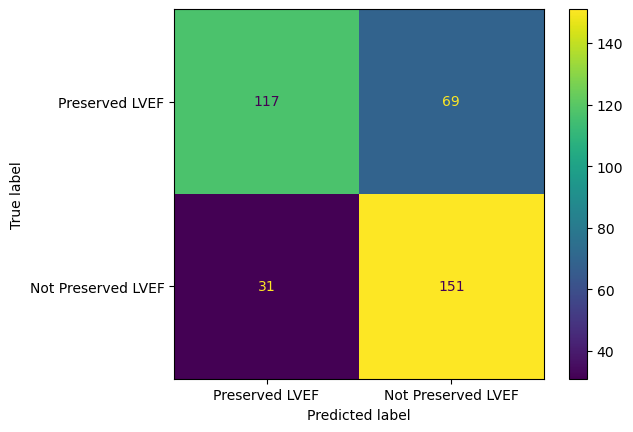

In [21]:
for model, df in model_dic_not_preserved_ef.items():
     plot_confusion_matrix(model, df, labels=['preserved','not_preserved'],
                          display_labels=['Preserved LVEF','Not Preserved LVEF']
                          )   